# **Homework 1: Regression**
The goal of this homework: create a regression model for the prediction car fuel efficiency (column 'fuel_efficiency_mpg').

Data source: [Kaggle](https://www.kaggle.com/datasets/CooperUnion/cardataset)

## 1. Import packages

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load data, explore, and select data

In [4]:
df_raw = pd.read_csv("data/car_fuel_efficiency.csv")
df_raw.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


Data selection

In [37]:
cols_of_interest = ['engine_displacement',
                   'horsepower',
                   'vehicle_weight',
                   'model_year',
                   'fuel_efficiency_mpg']
df_selection = df_raw.copy()
df_selection = df_selection[cols_of_interest]
df_selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   horsepower           8996 non-null   float64
 2   vehicle_weight       9704 non-null   float64
 3   model_year           9704 non-null   int64  
 4   fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 379.2 KB


In [38]:
df_selection.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


## 3. Exploratory data analysis

### 3.1. Check for duplicates

In [39]:
df_selection.duplicated().any()

np.False_

The data has no duplicated rows.

### 3.2. Check for missing values

In [40]:
df_selection.isna().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [41]:
df_selection.isna().mean()*100

engine_displacement    0.00000
horsepower             7.29596
vehicle_weight         0.00000
model_year             0.00000
fuel_efficiency_mpg    0.00000
dtype: float64

Only 7.30% of `horsepower` is missing.

### 3.3. Data distribution

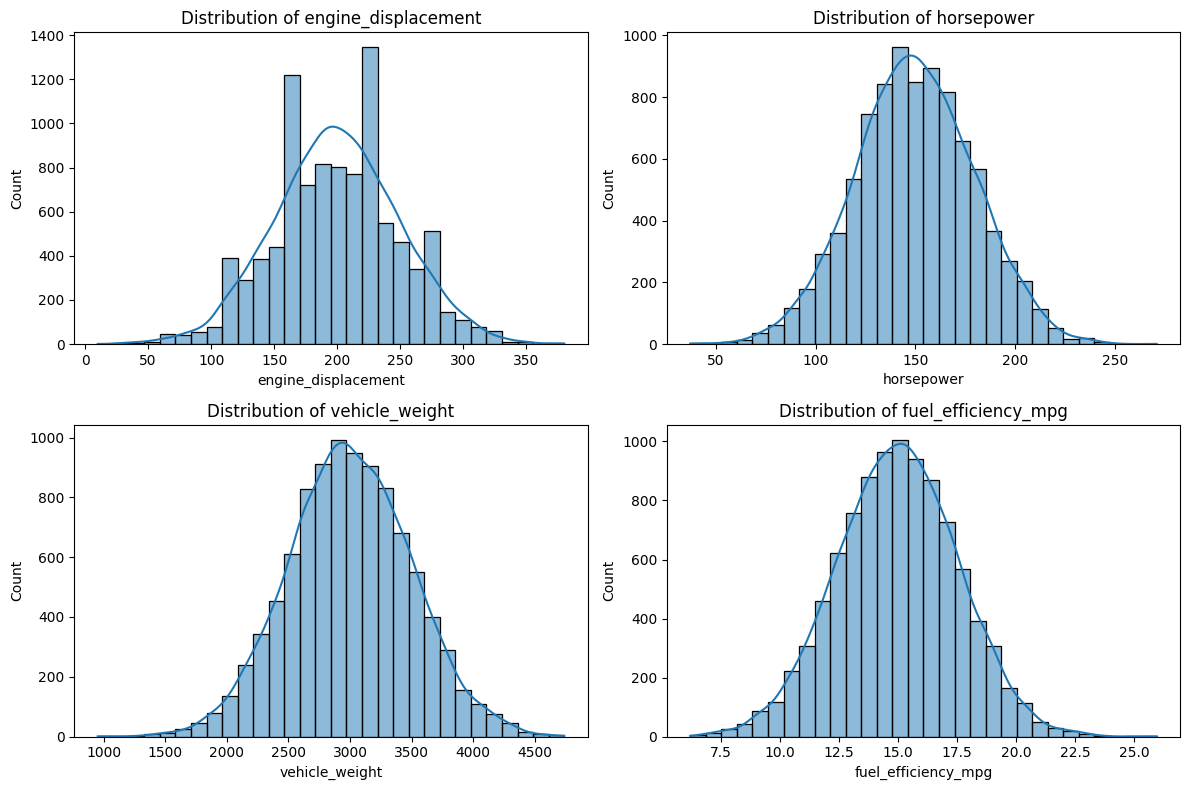

In [42]:
numeric_cols = ['engine_displacement', 'horsepower', 'vehicle_weight', 'fuel_efficiency_mpg']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_selection[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Distribution of `horsepower`, `vehicle_weight`, and `fuel_efficiency_mpg` is fairly normal.
`engine_displacement` seems to be bimodal; maybe two categories of vehicles or make based on year.
Let's check the existence of bimodality.

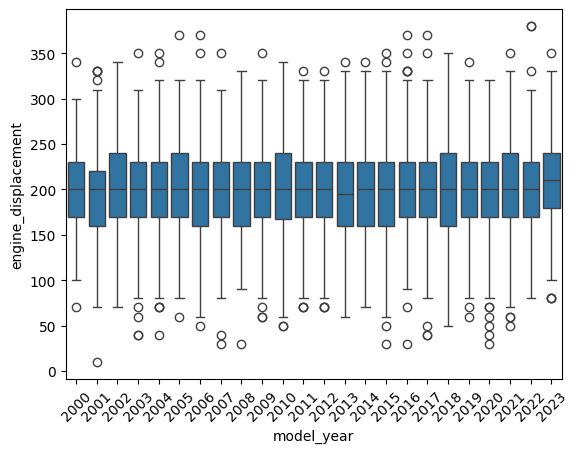

In [43]:
sns.boxplot(x='model_year', y='engine_displacement', data=df_selection)
plt.xticks(rotation=45)
plt.show()

Those boxplots show no visible strong upward or downward trend

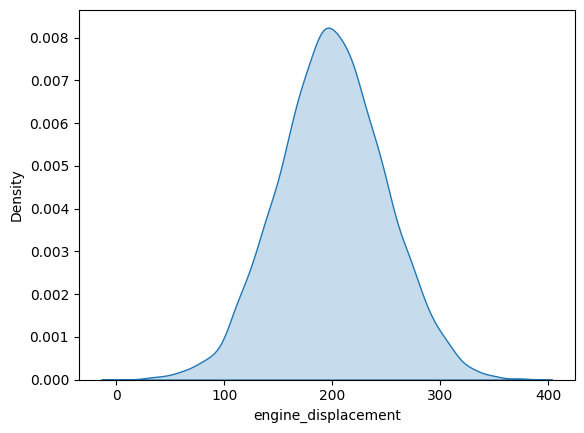

In [44]:
sns.kdeplot(df_selection['engine_displacement'], fill=True);

The smooth kernel density plot looks unimodal and approximately normal. Add to the previous boxplots,
the bimodality of `engine_displacement` is not a real bimodality; maybe like a bin artifact or minor local
variation within one man cluster.

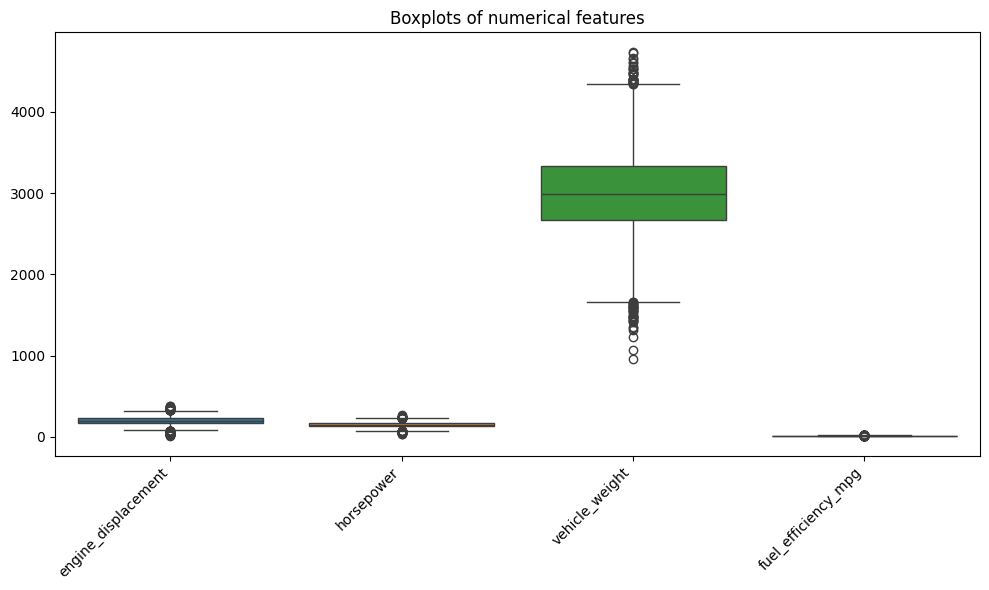

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_selection[numeric_cols])
plt.title('Boxplots of numerical features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [46]:
df_selection[['engine_displacement', 'horsepower']].corr()

,engine_displacement,horsepower
engine_displacement,1.00000,-0.01438
horsepower,-0.01438,1.00000


In [47]:
df_selection.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


In [48]:
df_selection['horsepower'].median()

np.float64(149.0)

Missing values imputation

`horsepower` is fairly normal. The missing values will be imputed using its mean.

In [49]:
df_selection['horsepower'] = df_selection['horsepower'].fillna(df_selection['horsepower'].mean())

Check missing values after mean imputation

In [50]:
df_selection.isna().mean()*100

engine_displacement    0.0
horsepower             0.0
vehicle_weight         0.0
model_year             0.0
fuel_efficiency_mpg    0.0
dtype: float64